# Importing Libraries

In [ ]:
#Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import warnings
warnings.filterwarnings("ignore")

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline


# Loading the Dataset

In [ ]:
# Uploading saved dataframe csv file from google drive
! gdown --id 1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX
To: /content/df_1.csv
100% 788M/788M [00:06<00:00, 125MB/s]


In [ ]:
%%time
# Load Data
df   = pd.read_csv('/content/df_1.csv')

CPU times: user 23.4 s, sys: 6.19 s, total: 29.6 s
Wall time: 29.5 s


In [ ]:
df.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V

In [ ]:
df.shape

(590540, 534)

# Model Building



In [ ]:
# Split the y variable series and X variables dataset
X = df.drop(['isFraud'],axis=1)
y = df.isFraud.astype(bool)

## Train-Test Split

Split the dataset into train set and test set. Train set will be used to train the model. Test set will be used to check the performance of model

In [ ]:
# Split the dataset into the training set and test set
from   sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(413378, 533) (413378,)
(177162, 533) (177162,)


## Handling Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

# replace inf
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Impute
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss

In [ ]:
# Impute X_Test before predicting
X_test_imputed = imputer.transform(X_test)

## Feature Scaling

In [ ]:
# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train_imputed)
print(scaler)

StandardScaler()


In [ ]:
# Transform and display the training data
X_standardized_train = scaler.transform(X_train_imputed)
train_data = pd.DataFrame(X_standardized_train)

In [ ]:
X_standardized_test = scaler.transform(X_test_imputed)
test_data = pd.DataFrame(X_standardized_test)

## Defining the ANN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

## ANN Model Architecture Summary

In [ ]:
model = build_model((X_standardized_train.shape[1],))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               68352     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 79,233
Trainable params: 79,233
Non-trainable params: 0
_________________________________________________________________
None


## ANN Model Architecture Plot

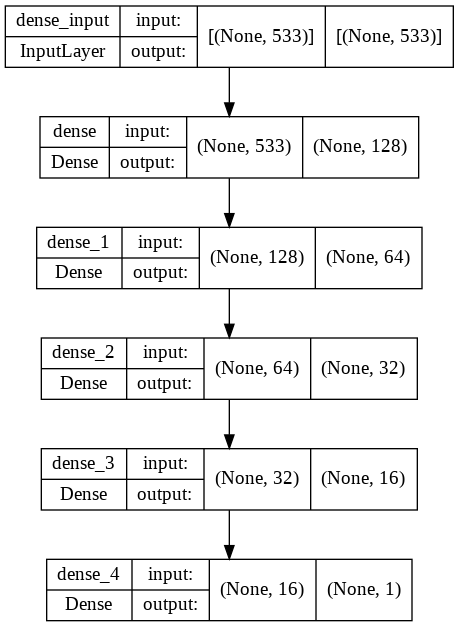

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='ann_model_summary.png', show_shapes=True, show_layer_names=True)

## ANN Model Architecture Graph using Keras Visualizer

In [ ]:
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


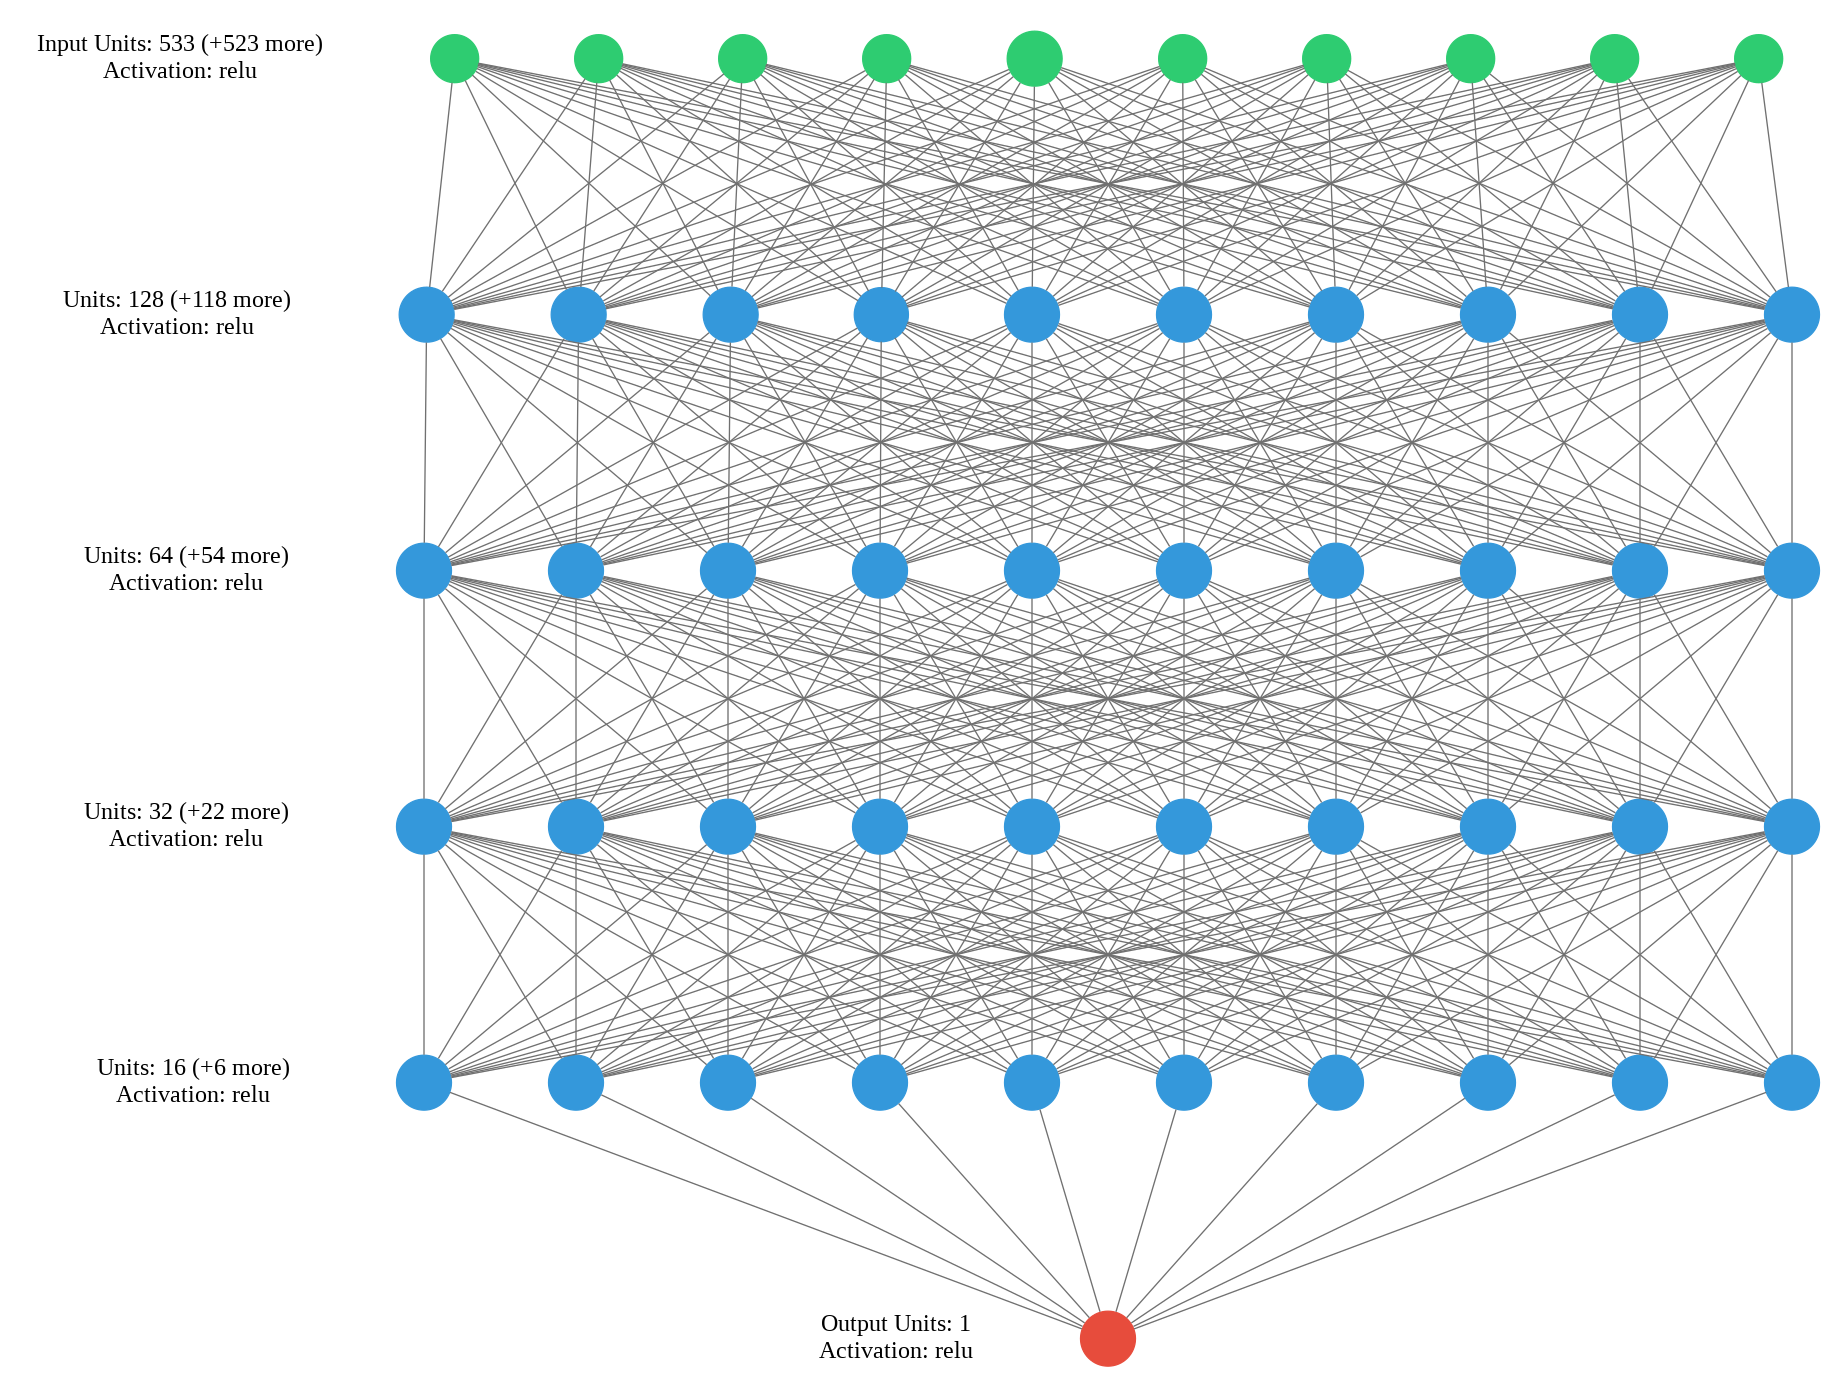

In [ ]:
from keras_visualizer import visualizer 
visualizer(model,filename='ann_graph', format='png', view=True)

from IPython.display import Image
Image('/content/ann_graph.png',width = 800, height = 600)


## Training the ANN Model

In [ ]:
%%time
model_history = model.fit(X_standardized_train, y_train, validation_data=(X_standardized_test, y_test), epochs= 100)

Epoch 1/100
12919/12919 [==============================] - 56s 4ms/step - loss: 0.1133 - accuracy: 0.9701 - val_loss: 0.1086 - val_accuracy: 0.9709
Epoch 2/100
12919/12919 [==============================] - 55s 4ms/step - loss: 0.1045 - accuracy: 0.9721 - val_loss: 0.1094 - val_accuracy: 0.9713
Epoch 3/100
12919/12919 [==============================] - 52s 4ms/step - loss: 0.1008 - accuracy: 0.9728 - val_loss: 0.1053 - val_accuracy: 0.9719
Epoch 4/100
12919/12919 [==============================] - 53s 4ms/step - loss: 0.0983 - accuracy: 0.9735 - val_loss: 0.1012 - val_accuracy: 0.9726
Epoch 5/100
12919/12919 [==============================] - 52s 4ms/step - loss: 0.0963 - accuracy: 0.9739 - val_loss: 0.0986 - val_accuracy: 0.9734
Epoch 6/100
12919/12919 [==============================] - 53s 4ms/step - loss: 0.0949 - accuracy: 0.9744 - val_loss: 0.0959 - val_accuracy: 0.9739
Epoch 7/100
12919/12919 [==============================] - 52s 4ms/step - loss: 0.0929 - accuracy: 0.9749 - val_

In [ ]:
#Model Accuracy Results
print("Results:")
print("---------------------")
scores_train = model.evaluate(X_standardized_train, y_train, verbose= 2)
print("Training Accuracy: %.2f%%\n" % (scores_train[1] * 100))
scores_test = model.evaluate(X_standardized_test, y_test, verbose= 2)
print("Testing Accuracy: %.2f%%\n" % (scores_test[1] * 100))

Results:
---------------------
12919/12919 - 27s - loss: 0.0494 - accuracy: 0.9859 - 27s/epoch - 2ms/step
Training Accuracy: 98.59%

5537/5537 - 10s - loss: 0.1142 - accuracy: 0.9756 - 10s/epoch - 2ms/step
Testing Accuracy: 97.56%



## ANN Model Accuracy on Train and Test Data

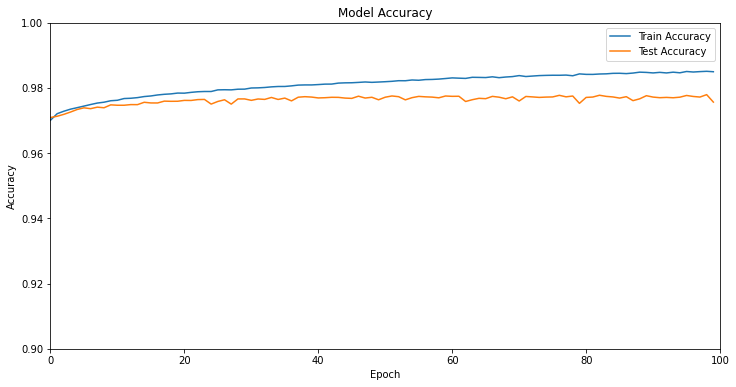

In [ ]:
# summarize history for accuracy
plt.figure(figsize = (12,6))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper right')
plt.xlim(0,100)
plt.ylim(0.90,1.0)
plt.show()

## ANN Model Loss on Train and Test Data

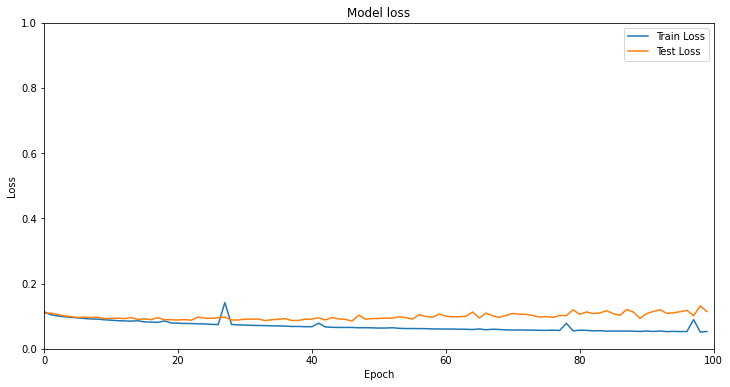

In [ ]:
# summarize history for loss
plt.figure(figsize = (12,6))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlim(0,100)
plt.ylim(0.0,1.0)
plt.show()

In [ ]:
# getting predictions for the validation set
prediction = model.predict(X_standardized_test)

# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in prediction]

## Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics  import classification_report 
from sklearn.metrics  import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics  import roc_auc_score 
from sklearn.metrics  import plot_roc_curve 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics  import plot_precision_recall_curve

In [ ]:
print("\n Accuracy Score : ",accuracy_score(y_test, y_pred_categorical1))
print('\n')
print("\n AUC - ROC Score : ", roc_auc_score(y_test, y_pred_categorical1))
print('\n')
print("\n Classification Report : \n\n",classification_report(y_test, y_pred_categorical1))
print('\n')
print("\n Confusion Matrix : \n\n",confusion_matrix(y_test, y_pred_categorical1))
print('\n')


 Accuracy Score :  0.9756381165261173



 AUC - ROC Score :  0.7646033080676907



 Classification Report : 

               precision    recall  f1-score   support

       False       0.98      0.99      0.99    170821
        True       0.71      0.54      0.61      6341

    accuracy                           0.98    177162
   macro avg       0.85      0.76      0.80    177162
weighted avg       0.97      0.98      0.97    177162




 Confusion Matrix : 

 [[169439   1382]
 [  2934   3407]]




## Confusion Matrix Plot

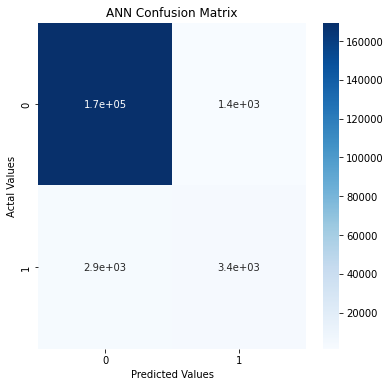

In [ ]:
%matplotlib inline
CM=confusion_matrix(y_test,y_pred_categorical1)
CM_df = pd.DataFrame(CM,index = ['0','1'], columns = ['0','1'])
plt.figure(figsize=(6,6))
sns.heatmap(CM_df, annot=True, cmap="Blues")
plt.title('ANN Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()